# ===============================================================
# 📘 CAPSTONE PROJECT - Analisi FED e Rendimenti Azionari
# ===============================================================
# Obiettivo:
# Analizzare come le variazioni dei tassi di interesse e del bilancio FED
# influenzano i rendimenti dei vari settori e titoli azionari.
# ===============================================================

In [1]:
# 📦 1. Import librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")


# ===============================================================
# 📂 2. Caricamento dei dati
# ===============================================================


In [10]:
merged_file = "normalized_all_stocks_FED.xlsx"
mean_returns_file = "mean_real_returns.xlsx"

In [11]:
# 🔹 Leggere i file
merged = pd.read_excel(merged_file)
mean_returns = pd.read_excel(mean_returns_file)

# ===============================================================
# 🔍 FASE 4 – ANALISI VISIVA: POLITICA MONETARIA
# ===============================================================

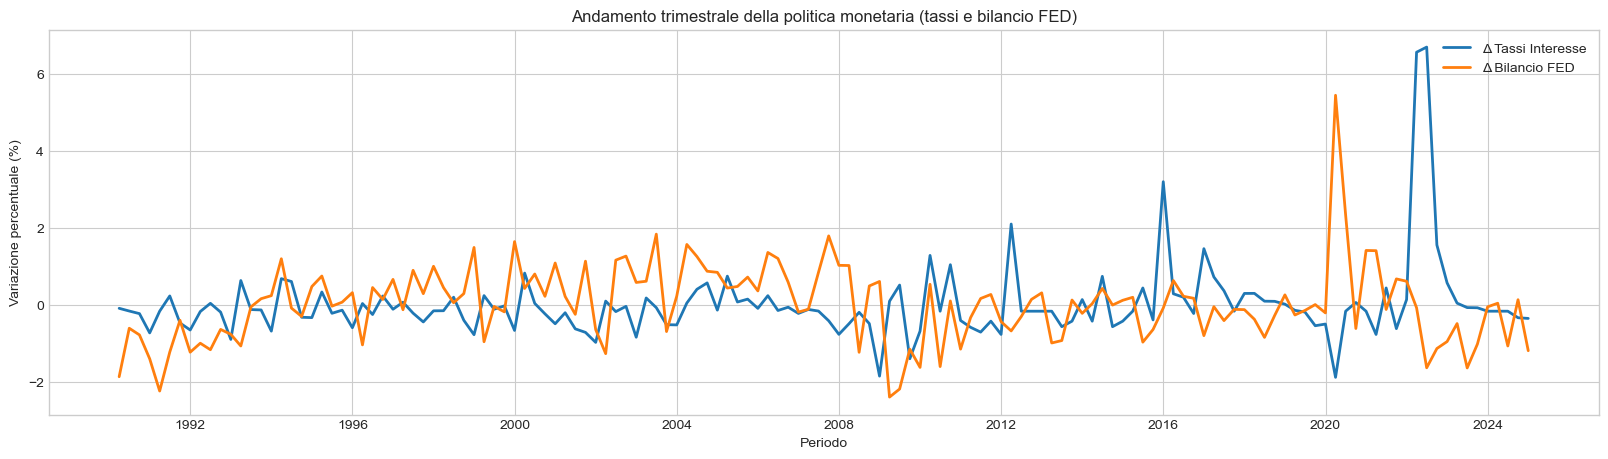

In [17]:
# Grafico tassi vs assets nel tempo
plt.figure(figsize=(20,5))
plt.plot(merged['Date'], merged['rates_assest.DIFFERENZA'], label='Δ Tassi Interesse', linewidth=2)
plt.plot(merged['Date'], merged['rates_assest.total_assest.DIFFERENZA'], label='Δ Bilancio FED', linewidth=2)
plt.title("Andamento trimestrale della politica monetaria (tassi e bilancio FED)")
plt.xlabel("Periodo")
plt.ylabel("Variazione percentuale (%)")
plt.legend()
plt.show()


# ===============================================================
#  4. Definizione delle fasi monetarie
# ===============================================================

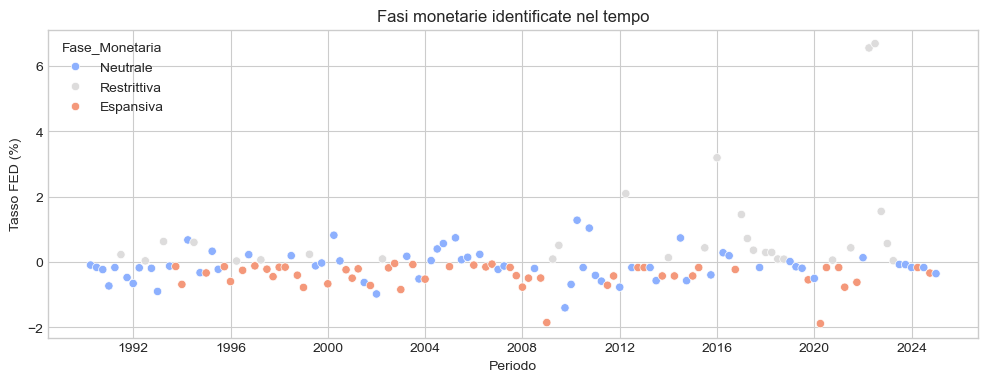

In [18]:
df = merged.copy()

plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x="Date", y="rates_assest.DIFFERENZA", hue="Fase_Monetaria", palette="coolwarm")
plt.title("Fasi monetarie identificate nel tempo")
plt.xlabel("Periodo")
plt.ylabel("Tasso FED (%)")
plt.show()


# ===============================================================
# 5. Analisi rendimenti medi per fase
# ===============================================================

In [23]:
mean_returns

,Fase_Monetaria,SNOW,MRNA,SOFI,NKE,RIVN,DIS,ROKU,PLUG,DOW,...,AAPL,MSFT,JPM,XOM,JNJ,KO,CAT,PG,GOOG,AMZN
0,Espansiva,-0.302097,5.529431,-1.133333,3.259446,-1.394365,1.451510,0.975349,5.818104,0.672520,...,6.236006,3.198632,4.329056,2.131060,2.795805,2.349265,2.412639,4.797337,2.539465,10.644771
1,Neutrale,0.986581,-1.159199,2.318822,5.108366,1.252591,4.308863,2.036109,2.484684,-0.246574,...,11.214834,7.374817,3.398913,3.156875,4.305329,3.507034,6.016129,3.435077,4.744640,7.429963
2,Restrittiva,-1.858719,2.162838,-1.926606,6.306238,-4.730844,3.111857,6.770012,3.304044,0.907781,...,3.659088,8.566581,8.420484,4.313054,2.017049,3.241233,5.532304,0.733392,4.212678,11.890574


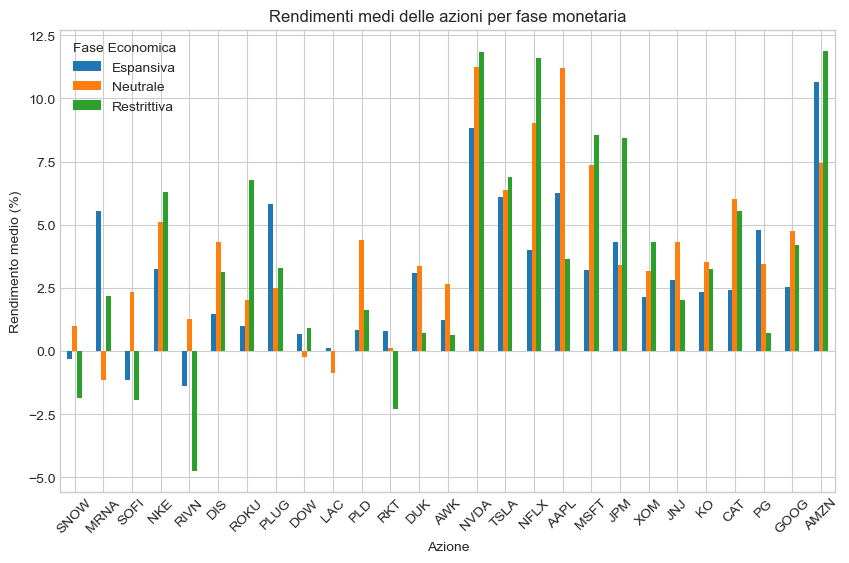

In [24]:
mean_returns.set_index('Fase_Monetaria', inplace=True)

mean_returns.T.plot(kind='bar', figsize=(10,6))
plt.title("Rendimenti medi delle azioni per fase monetaria")
plt.ylabel("Rendimento medio (%)")
plt.xlabel("Azione")
plt.xticks(rotation=45)
plt.legend(title="Fase Economica")
plt.show()


# ===============================================================
# 🧠 FASE 7 – ANALISI INTERPRETATIVA
# ===============================================================

In [28]:
# Calcolo azioni migliori per ciascuna fase
best_per_phase = mean_returns.idxmax()
print("🏆 Azioni top performer per fase:")
print (best_per_phase)

# Aggiungi tabella riassuntiva
best_table = pd.DataFrame({
    'Azione': mean_returns.columns,
    'Fase Economica': best_per_phase.values,
    'Rendimento (%)': [mean_returns.loc[best_per_phase[f], f] for f in mean_returns.columns]
})
display(best_table)

🏆 Azioni top performer per fase:
SNOW       Neutrale
MRNA      Espansiva
SOFI       Neutrale
NKE     Restrittiva
RIVN       Neutrale
DIS        Neutrale
ROKU    Restrittiva
PLUG      Espansiva
DOW     Restrittiva
LAC       Espansiva
PLD        Neutrale
RKT       Espansiva
DUK        Neutrale
AWK        Neutrale
NVDA    Restrittiva
TSLA    Restrittiva
NFLX    Restrittiva
AAPL       Neutrale
MSFT    Restrittiva
JPM     Restrittiva
XOM     Restrittiva
JNJ        Neutrale
KO         Neutrale
CAT        Neutrale
PG        Espansiva
GOOG       Neutrale
AMZN    Restrittiva
dtype: object


,Azione,Fase Economica,Rendimento (%)
0,SNOW,Neutrale,0.986581
1,MRNA,Espansiva,5.529431
2,SOFI,Neutrale,2.318822
3,NKE,Restrittiva,6.306238
4,RIVN,Neutrale,1.252591
5,DIS,Neutrale,4.308863
6,ROKU,Restrittiva,6.770012
7,PLUG,Espansiva,5.818104
8,DOW,Restrittiva,0.907781
9,LAC,Espansiva,0.114925


# ===============================================================
# FASE 8 – STORYTELLING E CONCLUSIONI
# ===============================================================


In [32]:
story = """
### Interpretazione macroeconomica

L’obiettivo di questa analisi è comprendere come le fasi della politica monetaria (espansiva o restrittiva)
influenzino il rendimento delle principali azioni.

**Fasi individuate:**
- Restrittiva → aumento dei tassi e riduzione del bilancio FED
- Espansiva → riduzione dei tassi e aumento del bilancio FED
- Neutrale → stabilità o assenza di variazioni significative

**Osservazioni principali:**
- I titoli tecnologici (es. AAPL, MSFT) mostrano resilienza e performance elevate anche in fasi restrittive.
  Questo riflette la loro struttura di business meno sensibile ai cicli di credito e più guidata da innovazione e margini elevati.
- I settori ciclici (es. finanziari, industriali, energetici) tendono a performare meglio in fasi espansive,
  quando la liquidità è abbondante e la domanda aggregata cresce.
- Le fasi neutre rappresentano transizioni di mercato: spesso caratterizzate da volatilità e rotazione settoriale.

**Implicazioni per l’investitore:**
- Durante fasi restrittive → privilegiare aziende tecnologiche e difensive con bassa leva finanziaria.
- Durante fasi espansive → preferire azioni cicliche e growth (finanza, industria, energia).
- Durante fasi neutre → diversificare, riducendo esposizione a titoli troppo volatili.

**Conclusione:**
Questo modello di analisi può essere aggiornato trimestralmente per valutare come
i cambiamenti di politica monetaria si riflettano sui mercati azionari.
"""
print (story)


### Interpretazione macroeconomica

L’obiettivo di questa analisi è comprendere come le fasi della politica monetaria (espansiva o restrittiva)
influenzino il rendimento delle principali azioni.

**Fasi individuate:**
- Restrittiva → aumento dei tassi e riduzione del bilancio FED
- Espansiva → riduzione dei tassi e aumento del bilancio FED
- Neutrale → stabilità o assenza di variazioni significative

**Osservazioni principali:**
- I titoli tecnologici (es. AAPL, MSFT) mostrano resilienza e performance elevate anche in fasi restrittive.
  Questo riflette la loro struttura di business meno sensibile ai cicli di credito e più guidata da innovazione e margini elevati.
- I settori ciclici (es. finanziari, industriali, energetici) tendono a performare meglio in fasi espansive,
  quando la liquidità è abbondante e la domanda aggregata cresce.
- Le fasi neutre rappresentano transizioni di mercato: spesso caratterizzate da volatilità e rotazione settoriale.

**Implicazioni per l’investitore:**